# 1. yaml file to beam generator

In [1]:
# import create_beam function from module

from VCC_ML import create_beam

#### You can add/change parameters in any order

In [2]:
file = 'data/rad.gaussian.in.yaml'
parameters = dict({'n_particle':123456, 
          'r_dist:sigma_xy:units':'mm', 
          'r_dist:sigma_xy:value': 3.14,
          'start:MTE:units':'meV',
          'total_charge:units':'pC',
          't_dist:min_t:units':'ys',
          't_dist:min_t:value':2718,
          'start:MTE:value':0.511,
          'start:MTE:units':'eV'
         })

create_beam(file, parameters)

<disgten.Generator with input: 
n_particle: 123456
output:
  file: rad.gaussian.out.txt
  type: gpt
r_dist:
  sigma_xy:
    units: mm
    value: 3.14
  type: radial_gaussian
random_type: hammersley
start:
  MTE:
    units: eV
    value: 0.511
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 2
  min_t:
    units: ys
    value: 2718
  type: uniform
total_charge:
  units: pC
  value: 10

>

#### It also catches some errors/conditions

In [3]:
# No parameters given
create_beam(file)

# Invalid parameter name
par = dict({'N_particle':1234})
create_beam(file, par)

No parameters changed
ERROR: One or more parameter names was invalid, please check spelling


#### List of correctly-formatted parameters for convenience

In [4]:
parameters_list = [['n_particle'], 
                   ['output:file'],['output:type'], 
                   ['r_dist:sigma_xy:units'],['r_dist:sigma_xy:value'],['r_dist:type'],
                   ['random_type'],
                   ['start:MTE:units'],['start:MTE:value'],['start:type:cathode'],
                   ['t_dist:max_t:units'],['t_dist:max_t:value'],['t_dist:min_t:units'],['t_dist:min_t:value'],['t_dist:type'],
                   ['total_charge:units'],['total_charge:value']]

# 2. gen to histogram

#### The output of create_beam can be used in show_histogram to display a 2d image of the beam/original yaml file

No parameters changed
No parameters changed
No parameters changed
No parameters changed


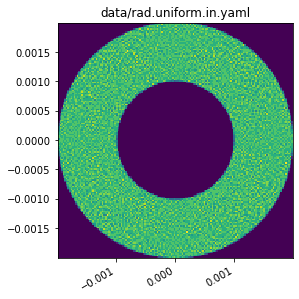

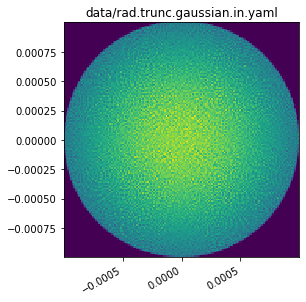

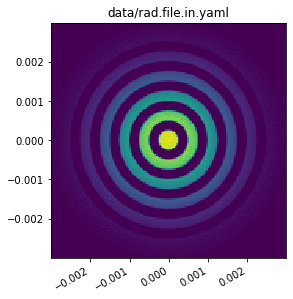

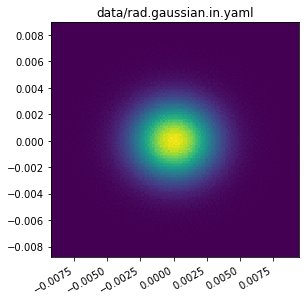

In [5]:
import VCC_ML

files = ['data/rad.uniform.in.yaml',
         'data/rad.trunc.gaussian.in.yaml',
         'data/rad.file.in.yaml',
         'data/rad.gaussian.in.yaml']
bins = 150

for file in files:
    gen = VCC_ML.create_beam(file)
    VCC_ML.show_histogram(gen, bins, figsize=[6.4, 4.8], title=file)